In [3]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\asus\Downloads\Customer_Data_Cleaned.xlsx" 
df = pd.read_excel(file_path)

# Inspect data
print(df.head())
print(df.info())
print(df.isnull().sum())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27     Deal 2           Yes             No  ...   
1                13     Deal 2           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8     Deal 2           Yes             No  ...   

  Monthly_Charge Total_Charges Total_Refunds Total_Extra_Data_Charges  \
0           65.6        593.30          0.00                        0   
1           

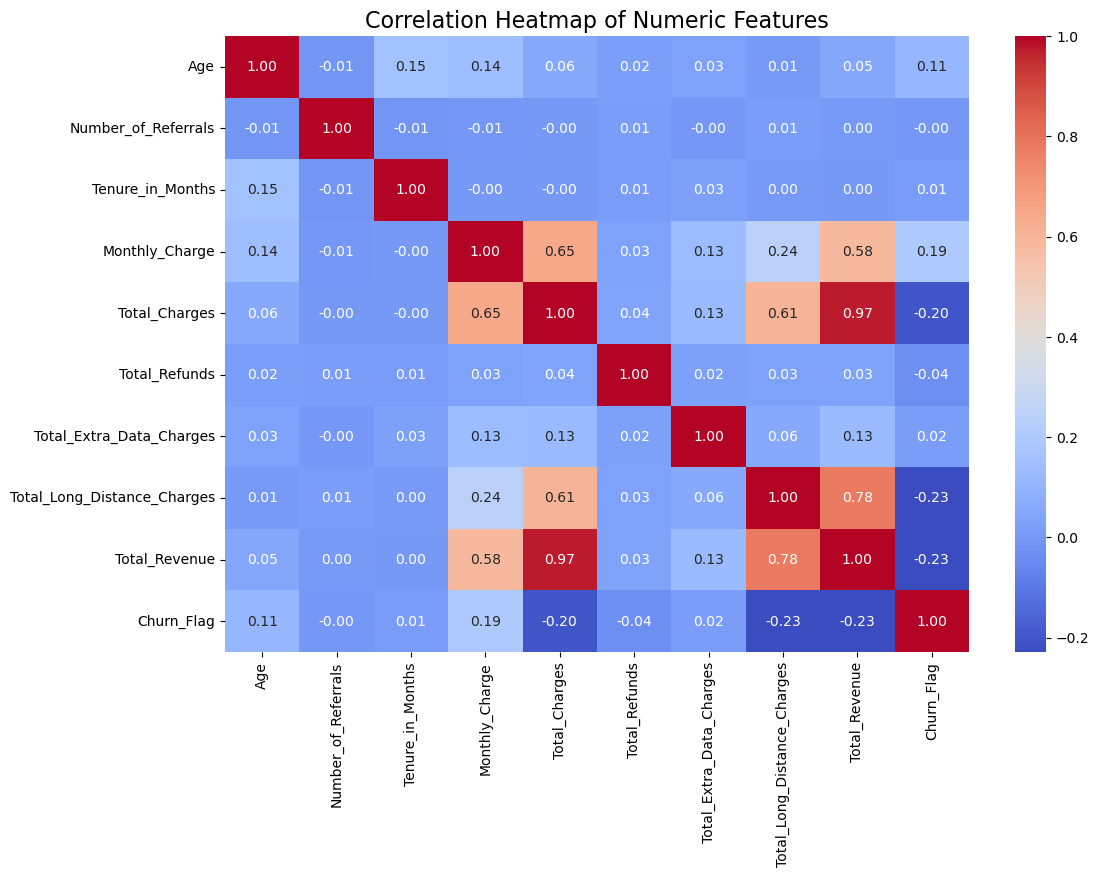

In [4]:
# Step 3: Exploratory Data Analysis (Correlation Heatmap for numeric variables)

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Make a copy of dataset
df_ml = df.copy()

# ----------------------
# 1. Drop redundant features
# ----------------------
if "Total_Revenue" in df_ml.columns:
    df_ml.drop(columns=["Total_Revenue"], inplace=True)
if "Total_Charges" in df_ml.columns:
    df_ml.drop(columns=["Total_Charges"], inplace=True)

# ----------------------
# 2. Encode categorical variables
# ----------------------
categorical_cols = df_ml.select_dtypes(include=["object"]).columns.tolist()

# Label encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))

# ----------------------
# 3. Define features (X) and target (y)
# ----------------------
target_col = "Customer_Status" 
X = df_ml.drop(columns=[target_col])
y = df_ml[target_col]

# ----------------------
# 4. Train-test split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# 5. Scale numeric features
# ----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Train shape: (5134, 30)
Test shape: (1284, 30)
y_train shape: (5134,)
y_test shape: (1284,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------
# Logistic Regression
# ----------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))

# ----------------------
# Random Forest
# ----------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # trees don't need scaled data
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



📌 Logistic Regression Results:
Accuracy: 0.9626168224299065
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       0.74      0.63      0.68        82
           2       0.97      0.98      0.97       855

    accuracy                           0.96      1284
   macro avg       0.90      0.87      0.89      1284
weighted avg       0.96      0.96      0.96      1284

[[347   0   0]
 [  0  52  30]
 [  0  18 837]]

📌 Random Forest Results:
Accuracy: 0.9719626168224299
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       0.84      0.70      0.76        82
           2       0.97      0.99      0.98       855

    accuracy                           0.97      1284
   macro avg       0.94      0.89      0.91      1284
weighted avg       0.97      0.97      0.97      1284

[[347   0   0]
 [  0  57  25]
 [  0  11 844]]


C:\Users\asus\AppData\Local\Temp\ipykernel_24068\3501543476.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")


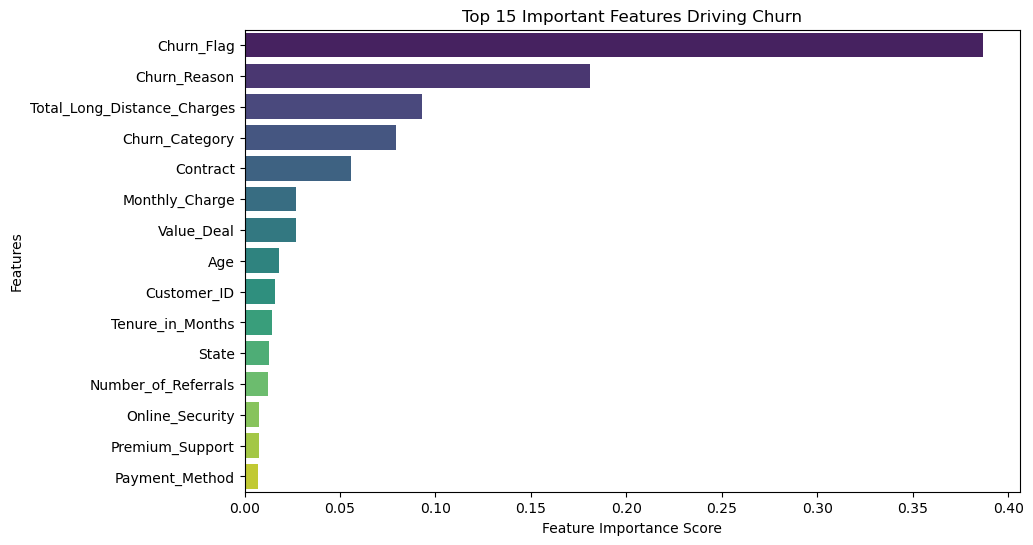

                        Feature  Importance
29                   Churn_Flag    0.386621
28                 Churn_Reason    0.180975
26  Total_Long_Distance_Charges    0.092867
27               Churn_Category    0.079543
20                     Contract    0.055611
23               Monthly_Charge    0.027045
7                    Value_Deal    0.026813
2                           Age    0.017835
0                   Customer_ID    0.016103
6              Tenure_in_Months    0.014422
4                         State    0.012979
5           Number_of_Referrals    0.012105
12              Online_Security    0.007772
15              Premium_Support    0.007600
22               Payment_Method    0.006887
10             Internet_Service    0.006569
8                 Phone_Service    0.006196
11                Internet_Type    0.005393
21            Paperless_Billing    0.004882
9                Multiple_Lines    0.004125
14       Device_Protection_Plan    0.004114
13                Online_Backup 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort by importance
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Display top 15
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Important Features Driving Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Print full importance list
print(feat_imp)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Copy X so we don't overwrite original
X_encoded = X.copy()

# Encode categorical columns
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Now split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5134, 30)
X_test shape: (1284, 30)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [10]:
#  Step 1: Train your model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#  Step 2: Make predictions
y_pred = rf.predict(X_test)

# Step 3: Evaluate metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9689
Recall: 0.9704
F1 Score: 0.9693


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test, scale=False):
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}


In [16]:
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    
    results.append([name, acc, prec, rec, f1])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.914330   0.910462  0.914330  0.910903
1        Decision Tree  0.953271   0.957175  0.953271  0.954916
2        Random Forest  0.970405   0.968939  0.970405  0.969340
3    Gradient Boosting  0.970405   0.970091  0.970405  0.970240
4                  SVM  0.665888   0.443407  0.665888  0.532337
5                  KNN  0.659657   0.642240  0.659657  0.649457


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------
# 🔹 1. Random Forest Tuning
# -----------------------------
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=3, n_jobs=-1, scoring="accuracy", verbose=2)

grid_rf.fit(X_train, y_train)

print(" Best Random Forest Params:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Tuned Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_rf, average="weighted"))
print("F1:", f1_score(y_test, y_pred_rf, average="weighted"))


# -----------------------------
# 🔹 2. Gradient Boosting Tuning
# -----------------------------
gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                       cv=3, n_jobs=-1, scoring="accuracy", verbose=2)

grid_gb.fit(X_train, y_train)

print("\n Best Gradient Boosting Params:", grid_gb.best_params_)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("\nGradient Boosting Tuned Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_gb, average="weighted"))
print("F1:", f1_score(y_test, y_pred_gb, average="weighted"))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_excel( r"C:\Users\asus\Downloads\Customer_Data_Cleaned.xlsx" )   
# -------------------------------
# Clean the Data
# -------------------------------

# Drop duplicate rows
df = df.drop_duplicates()

# Handle missing values (example: fill categorical with "Unknown", numeric with median)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna("Unknown")

for col in df.select_dtypes(include="number").columns:
    df[col] = df[col].fillna(df[col].median())

# Convert Churn_Status (Yes/No) into binary column
df["Churn_Flag"] = df["Customer_Status"].apply(lambda x: 1 if x == "Churned" else 0)

# Save cleaned dataset
df_clean = df.copy()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


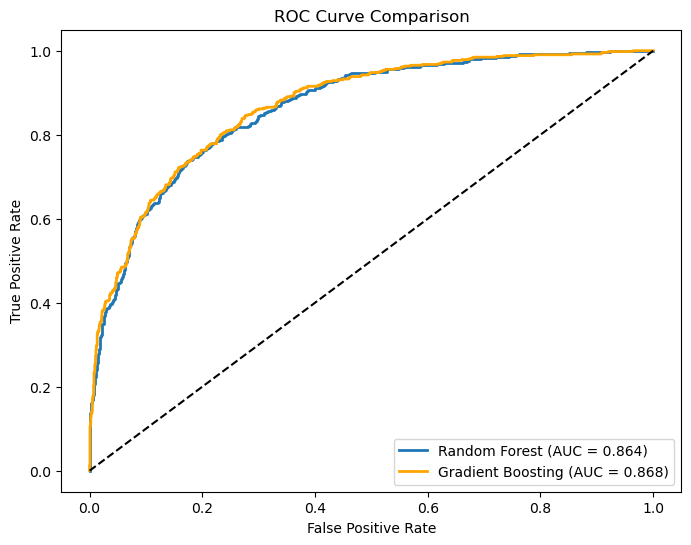

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Prepare Data (X, y)
# -------------------------------
X = df_clean.drop(["Customer_ID", "Customer_Status", "Churn_Category", "Churn_Reason", "Churn_Flag"], axis=1)
y = df_clean["Churn_Flag"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# -------------------------------
# Random Forest with GridSearchCV
# -------------------------------
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# -------------------------------
# Gradient Boosting with GridSearchCV
# -------------------------------
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

# -------------------------------
# ROC Curve Comparison
# -------------------------------
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_proba_gb = best_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})", linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.3f})", linewidth=2, color="orange")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Helper function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1, "ROC-AUC": auc}

# Collect results
results = []
results.append(evaluate_model("Random Forest (Tuned)", best_rf, X_test, y_test))
results.append(evaluate_model("Gradient Boosting (Tuned)", best_gb, X_test, y_test))

# Convert to DataFrame
df_results = pd.DataFrame(results)
print(df_results)


                       Model  Accuracy  Precision    Recall  F1 Score  \
0      Random Forest (Tuned)  0.821911   0.813847  0.821911  0.812707   
1  Gradient Boosting (Tuned)  0.822430   0.814785  0.822430  0.815271   

    ROC-AUC  
0  0.864416  
1  0.868371  


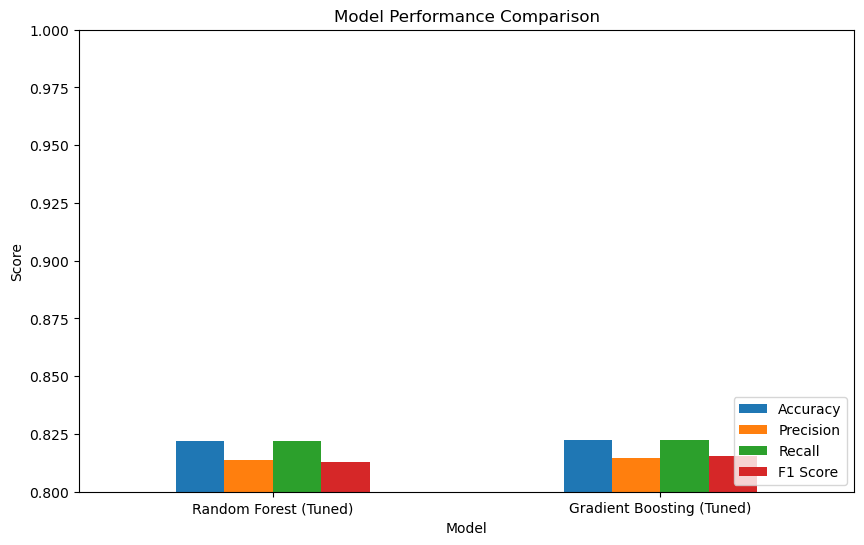

In [9]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Extract data for plotting
plot_data = df_results.set_index("Model")[metrics]

plot_data.plot(kind="bar", figsize=(10,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)  # zoom in for better comparison
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [13]:
# Import again (if needed)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid again
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search for Random Forest
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# Save the best model
rf_best = rf_grid.best_estimator_

print("✅ Best Random Forest Params:", rf_grid.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


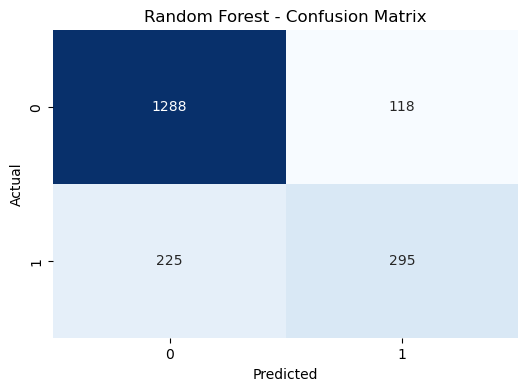

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_best.predict(X_test))

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
print("y_test class distribution:")
print(y_test.value_counts())


y_test class distribution:
Churn_Flag
0    1406
1     520
Name: count, dtype: int64


                        Feature  Importance
8                 Total_Revenue    0.106782
3                Monthly_Charge    0.101066
4                 Total_Charges    0.092851
7   Total_Long_Distance_Charges    0.080498
50            Contract_Two Year    0.071178
0                           Age    0.066931
2              Tenure_in_Months    0.046780
49            Contract_One Year    0.042387
1           Number_of_Referrals    0.041402
52   Payment_Method_Credit Card    0.030255


C:\Users\asus\AppData\Local\Temp\ipykernel_10356\3403934858.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette="viridis")


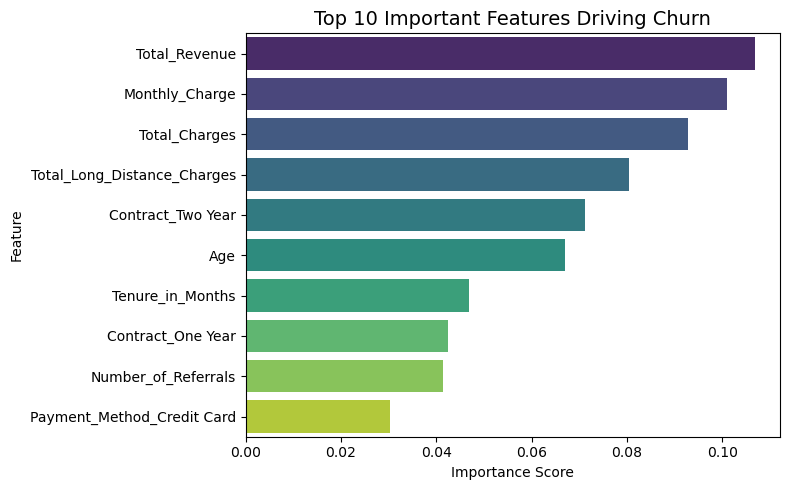

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the best RF model
importances = rf_best.feature_importances_
features = X.columns

# Put into DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette="viridis")
plt.title("Top 10 Important Features Driving Churn", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
 # EXTRACT BUSINESS INSIGHTS

In [19]:
df.groupby("Customer_Status")["Monthly_Charge"].mean()


Customer_Status
Churned    74.279965
Joined     43.774453
Stayed     63.158526
Name: Monthly_Charge, dtype: float64

In [24]:
df["Churn_Probability"] = rf_best.predict_proba(X)[:,1]
high_risk = df[df["Churn_Probability"] > 0.7]
print(high_risk.head())

# Optional: show how many high-risk customers we found
print("Number of high risk customers:", high_risk.shape[0])



   Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
2    25063-WES    Male   51      No      West Bengal                    4   
3    59787-KAR    Male   79      No        Karnataka                    3   
4    28544-TAM  Female   80      No       Tamil Nadu                    3   
40   73036-JAM  Female   66     Yes  Jammu & Kashmir                   10   
54   22439-RAJ  Female   73     Yes        Rajasthan                    4   

    Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
2                 35     Deal 5           Yes             No  ...   
3                 21     Deal 4           Yes             No  ...   
4                  8     Deal 2           Yes             No  ...   
40                21     Deal 2           Yes             No  ...   
54                 1     Deal 4           Yes             No  ...   

   Total_Charges Total_Refunds Total_Extra_Data_Charges  \
2         280.85           0.0                        0   
3   

In [25]:
# Summary statistics of high risk customers
print(high_risk.describe())

# Compare high risk vs overall customers
print("Average Monthly Charge (All):", df["Monthly_Charge"].mean())
print("Average Monthly Charge (High Risk):", high_risk["Monthly_Charge"].mean())

print("Average Tenure (All):", df["Tenure_in_Months"].mean())
print("Average Tenure (High Risk):", high_risk["Tenure_in_Months"].mean())

# Distribution of key categorical features
print("High Risk - Internet_Type Distribution:")
print(high_risk["Internet_Type"].value_counts())

print("High Risk - Online_Security Distribution:")
print(high_risk["Online_Security"].value_counts())


              Age  Number_of_Referrals  Tenure_in_Months  Monthly_Charge  \
count  852.000000           852.000000        852.000000      852.000000   
mean    52.634977             7.414319         16.723005       78.017840   
std     18.490811             4.572274         10.704153       19.787826   
min     18.000000             0.000000          1.000000       19.500000   
25%     35.750000             3.750000          7.000000       70.400000   
50%     56.000000             7.000000         15.000000       80.475000   
75%     69.250000            11.000000         26.000000       91.912500   
max     84.000000            15.000000         36.000000      112.950000   

       Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
count     852.000000     852.000000                852.000000   
mean      759.385329       1.263873                  5.410798   
std      1077.382595       6.592991                 20.486338   
min        19.550000       0.000000                  0.

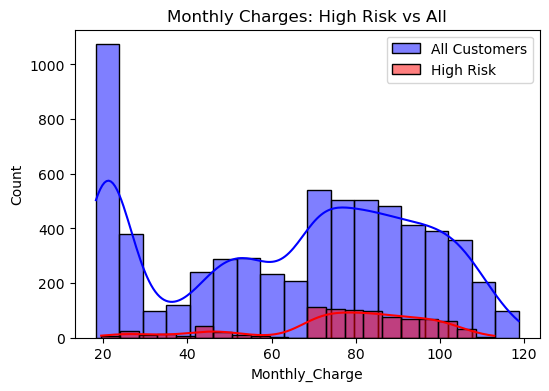

C:\Users\asus\AppData\Local\Temp\ipykernel_10356\3468723381.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Tenure_in_Months"], label="All Customers", shade=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_10356\3468723381.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_risk["Tenure_in_Months"], label="High Risk", shade=True, color="red")


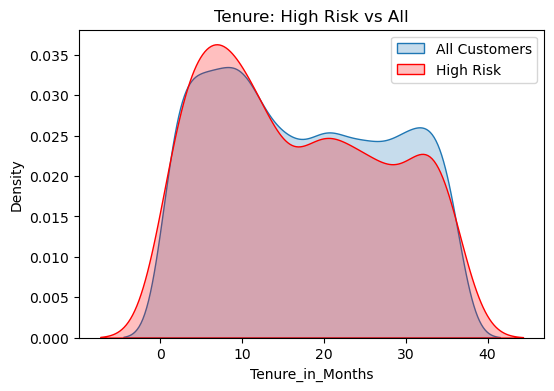

C:\Users\asus\AppData\Local\Temp\ipykernel_10356\3468723381.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Internet_Type", data=high_risk, palette="Set2")


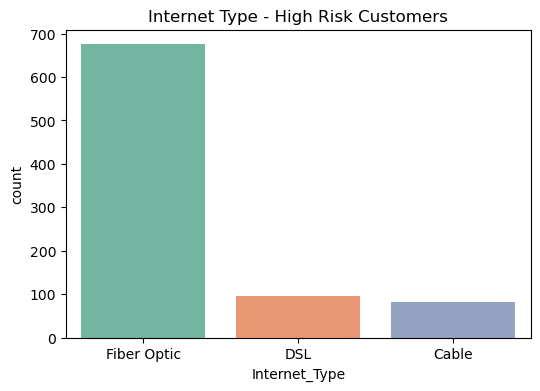

C:\Users\asus\AppData\Local\Temp\ipykernel_10356\3468723381.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Online_Security", data=high_risk, palette="Set1")


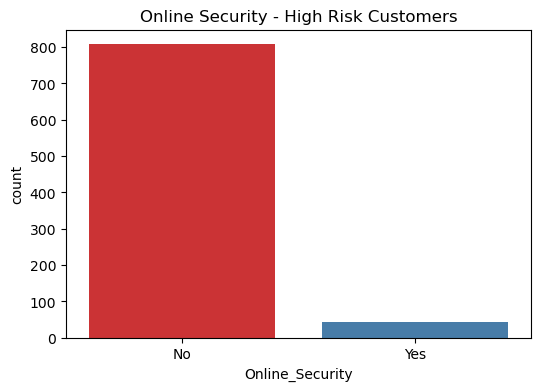

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Monthly_Charge"], kde=True, color="blue", label="All Customers")
sns.histplot(high_risk["Monthly_Charge"], kde=True, color="red", label="High Risk")
plt.legend()
plt.title("Monthly Charges: High Risk vs All")
plt.show()

# Tenure Distribution
plt.figure(figsize=(6,4))
sns.kdeplot(df["Tenure_in_Months"], label="All Customers", shade=True)
sns.kdeplot(high_risk["Tenure_in_Months"], label="High Risk", shade=True, color="red")
plt.legend()
plt.title("Tenure: High Risk vs All")
plt.show()

# Internet Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Internet_Type", data=high_risk, palette="Set2")
plt.title("Internet Type - High Risk Customers")
plt.show()

# Online Security Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Online_Security", data=high_risk, palette="Set1")
plt.title("Online Security - High Risk Customers")
plt.show()


In [31]:
# 2️ Extract Business Insights from High-Risk Customers

# 1. Compare Monthly Charges
print(" Monthly Charges:")
print("Average (All Customers):", round(df["Monthly_Charge"].mean(), 2))
print("Average (High Risk):", round(high_risk["Monthly_Charge"].mean(), 2))
print()

# 2. Compare Tenure
print(" Tenure in Months:")
print("Average (All Customers):", round(df["Tenure_in_Months"].mean(), 2))
print("Average (High Risk):", round(high_risk["Tenure_in_Months"].mean(), 2))
print()

# 3. Online Security Distribution
print(" Online Security (High Risk Customers):")
print(high_risk["Online_Security"].value_counts(normalize=True) * 100)
print()

# 4. Internet Type Distribution
print(" Internet Type (High Risk Customers):")
print(high_risk["Internet_Type"].value_counts(normalize=True) * 100)
print()

# 5. Extra: Value Deal Impact
print(" Value Deal (High Risk Customers):")
print(high_risk["Value_Deal"].value_counts(normalize=True) * 100)


 Monthly Charges:
Average (All Customers): 64.92
Average (High Risk): 78.02

 Tenure in Months:
Average (All Customers): 17.34
Average (High Risk): 16.72

 Online Security (High Risk Customers):
Online_Security
No     94.835681
Yes     5.164319
Name: proportion, dtype: float64

 Internet Type (High Risk Customers):
Internet_Type
Fiber Optic    79.225352
DSL            11.150235
Cable           9.624413
Name: proportion, dtype: float64

 Value Deal (High Risk Customers):
Value_Deal
Deal 2    56.103286
Deal 5    33.802817
Deal 4     6.338028
Deal 3     3.755869
Name: proportion, dtype: float64


In [29]:
df["Churn_Probability"] = rf_best.predict_proba(X)[:,1]
df.to_csv("churn_retention final_dataset.csv", index=False)


In [30]:
import os
print(os.getcwd())   # shows where churn_final_dataset.csv is saved


C:\Users\asus
